<a href="https://colab.research.google.com/github/Nicordaro/MML/blob/main/MML_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mathematics in Machine Learning
#Tesina
Nicolò Cordaro s272145

---



###Organize imports and dataset definition

In [30]:
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# Utility function to split dataset into train and test sets
from sklearn.model_selection import train_test_split    

In [8]:
# Clone github repository with dataset
# deleting if already present(Only for development purposes, colab limitations)
!rm -rf MML
!rm -rf dataset
if not os.path.isdir('./MML'):
  !git clone https://github.com/Nicordaro/MML
  
import shutil
    
source_dir = './MML/dataset'
target_dir = './dataset'
    
file_names = os.listdir(source_dir)
os.mkdir(target_dir)
for file_name in file_names:
  print(file_name)
  shutil.move(source_dir+"/"+file_name, target_dir+"/"+file_name)

Cloning into 'MML'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.
breast-cancer-wisconsin.names
breast-cancer-wisconsin.data


# Visualization

In [9]:
names = {"sampcode":"Sample code number", 
"clump": "Clump Thickness", 
"uni_size":"Uniformity of Cell Size", 
"uni_shape":"Uniformity of Cell Shape", 
"adhesion":"Marginal Adhesion", 
"epith_size":"Single Epithelial Cell Size", 
"nuclei":"Bare Nuclei", 
"chromatin":"Bland Chromatin", 
"nucleoli":"Normal Nucleoli", 
"mitoses":"Mitoses", 
"class":"Class"}


In [19]:
dataset_DF = pd.read_csv(target_dir+"/breast-cancer-wisconsin.data", names=list(names.keys()))
dataset_DF.iloc[:, 10] = dataset_DF.iloc[:, 10].replace(2, "benign").replace(4, "malign")
dataset_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sampcode    699 non-null    int64 
 1   clump       699 non-null    int64 
 2   uni_size    699 non-null    int64 
 3   uni_shape   699 non-null    int64 
 4   adhesion    699 non-null    int64 
 5   epith_size  699 non-null    int64 
 6   nuclei      699 non-null    object
 7   chromatin   699 non-null    int64 
 8   nucleoli    699 non-null    int64 
 9   mitoses     699 non-null    int64 
 10  class       699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB


In [11]:
# Non-numerical values are present in the Bare-nuclei feature
dataset_DF.isin(['?']).any()

sampcode      False
clump         False
uni_size      False
uni_shape     False
adhesion      False
epith_size    False
nuclei         True
chromatin     False
nucleoli      False
mitoses       False
class         False
dtype: bool

In [12]:
delete_row = dataset_DF[dataset_DF["nuclei"]=="?"].index
dataset_DF = dataset_DF.drop(delete_row)
dataset_DF.isin(['?']).any()
dataset_DF.iloc[:, 6] = pd.to_numeric(dataset_DF.iloc[:, 6])

In [13]:
dataset_DF.dtypes

sampcode       int64
clump          int64
uni_size       int64
uni_shape      int64
adhesion       int64
epith_size     int64
nuclei         int64
chromatin      int64
nucleoli       int64
mitoses        int64
class         object
dtype: object

In [14]:
dataset_DF.head(7)

,sampcode,clump,uni_size,uni_shape,adhesion,epith_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign
5,1017122,8,10,10,8,7,10,9,7,1,malign
6,1018099,1,1,1,1,2,10,3,1,1,benign


In [15]:
#Rimozione della feature sampcode, non utile alla fine dell'analisi che si vuole portare avanti
datasetPurged = dataset_DF.drop("sampcode", axis=1)
datasetPurged.describe()

,clump,uni_size,uni_shape,adhesion,epith_size,nuclei,chromatin,nucleoli,mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
benignDF = datasetPurged.loc[datasetPurged['class'] == "benign"]
benignDF.describe()

,clump,uni_size,uni_shape,adhesion,epith_size,nuclei,chromatin,nucleoli,mitoses
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
std,1.672661,0.855657,0.957031,0.917088,0.877112,1.177848,1.062299,0.954606,0.509738
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,8.000000,8.000000


In [17]:
malignDF = datasetPurged.loc[datasetPurged['class'] == "malign"]
malignDF.describe()

,clump,uni_size,uni_shape,adhesion,epith_size,nuclei,chromatin,nucleoli,mitoses
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510
std,2.437907,2.724244,2.569104,3.196631,2.443087,3.116679,2.282422,3.348876,2.564495
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000
75%,10.000000,10.000000,9.000000,8.000000,6.500000,10.000000,7.000000,9.500000,3.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [18]:
classSeries = datasetPurged["class"]
classSeries

0      benign
1      benign
2      benign
3      benign
4      benign
        ...  
694    benign
695    benign
696    malign
697    malign
698    malign
Name: class, Length: 683, dtype: object

In [67]:
normalized_df=(datasetPurged-datasetPurged.mean())/datasetPurged.std()
normalized_df["class"] = classSeries
normalized_df = normalized_df[['clump', 'uni_size', 'uni_shape',	'adhesion',	'epith_size',	'nuclei',	'chromatin', 'nucleoli',	'mitoses', 'class']]
encoded = pd.concat([normalized_df.iloc[:, 0:9], normalized_df["class"].replace("benign", "0").replace("malign", "1")], axis=1)
encoded

,clump,uni_size,uni_shape,adhesion,epith_size,nuclei,chromatin,nucleoli,mitoses,class
0,0.197760,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145,0
1,0.197760,0.277049,0.262591,0.757477,1.693925,1.771569,-0.181694,-0.284896,-0.348145,0
2,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.423907,-0.181694,-0.612478,-0.348145,0
3,0.552274,1.582044,1.601018,-0.638897,-0.105376,0.124962,-0.181694,1.353016,-0.348145,0
4,-0.156754,-0.701698,-0.741230,0.059290,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145,0
...,...,...,...,...,...,...,...,...,...,...
694,-0.511269,-0.701698,-0.741230,-0.638897,-0.105376,-0.423907,-0.998122,-0.612478,-0.348145,0
695,-0.865783,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.998122,-0.612478,-0.348145,0
696,0.197760,2.234542,2.270232,0.059290,1.693925,-0.149472,1.859375,2.335764,0.228998,1
697,-0.156754,1.582044,0.931805,0.408383,-0.105376,0.124962,2.675803,1.025434,-0.348145,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


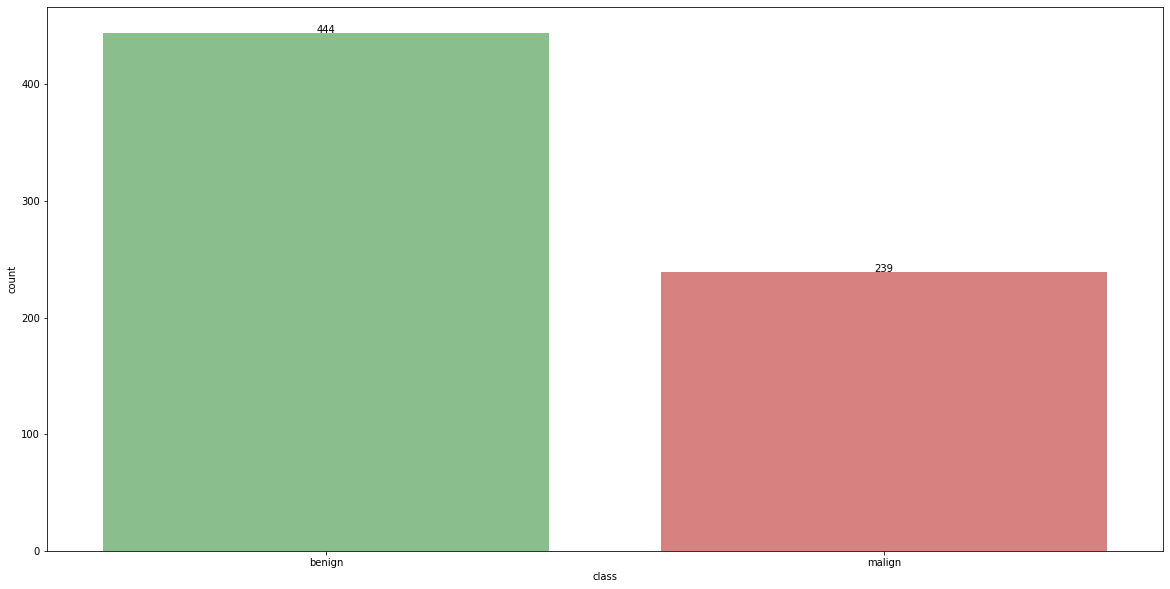

In [61]:
fig, ax1 = plt.subplots(figsize=(20,10))
col_dict = {"benign":"#81c784", "malign": "#e57373"}
graph = sns.countplot(normalized_df["class"], palette=col_dict);
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");

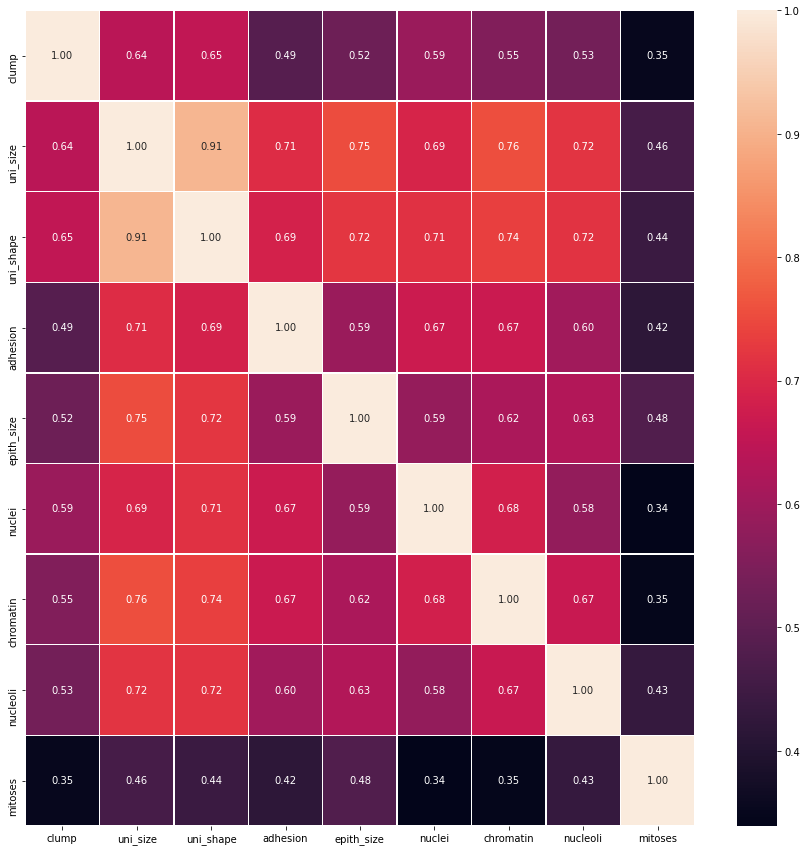

In [58]:
dataset_DF.corr()
corr = normalized_df.corr()
f,ax = plt.subplots(figsize=(15,15), facecolor="white")
sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.2f', ax=ax);

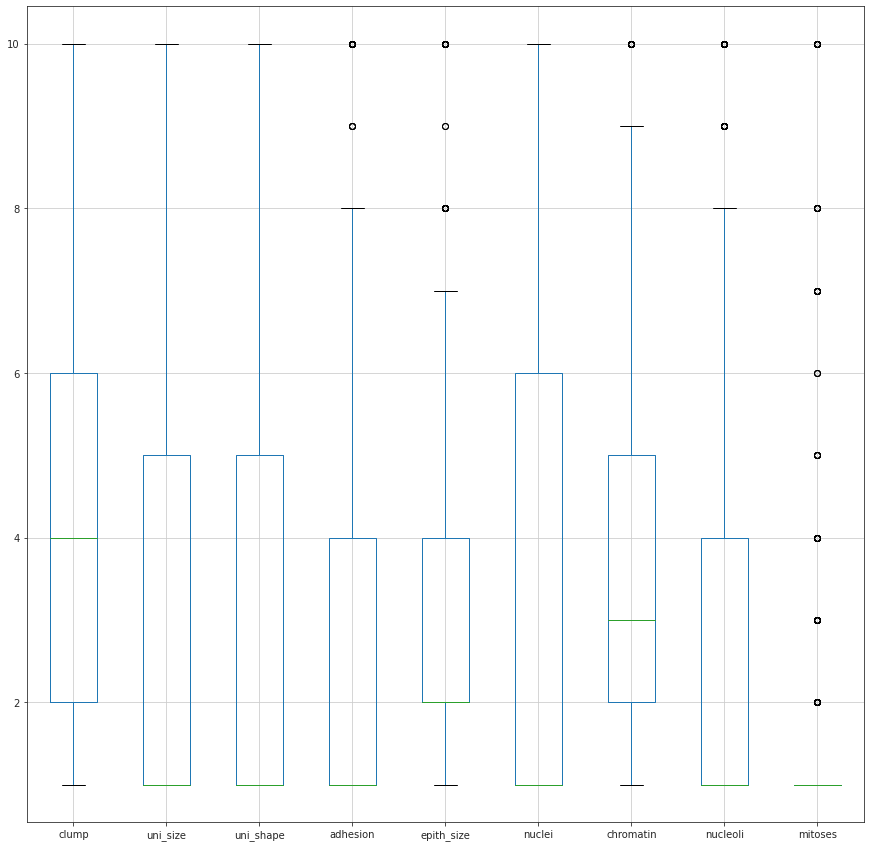

In [ ]:
fig = plt.figure(figsize = (15,15), facecolor="white")
ax = fig.gca()
datasetPurged.boxplot(ax=ax);

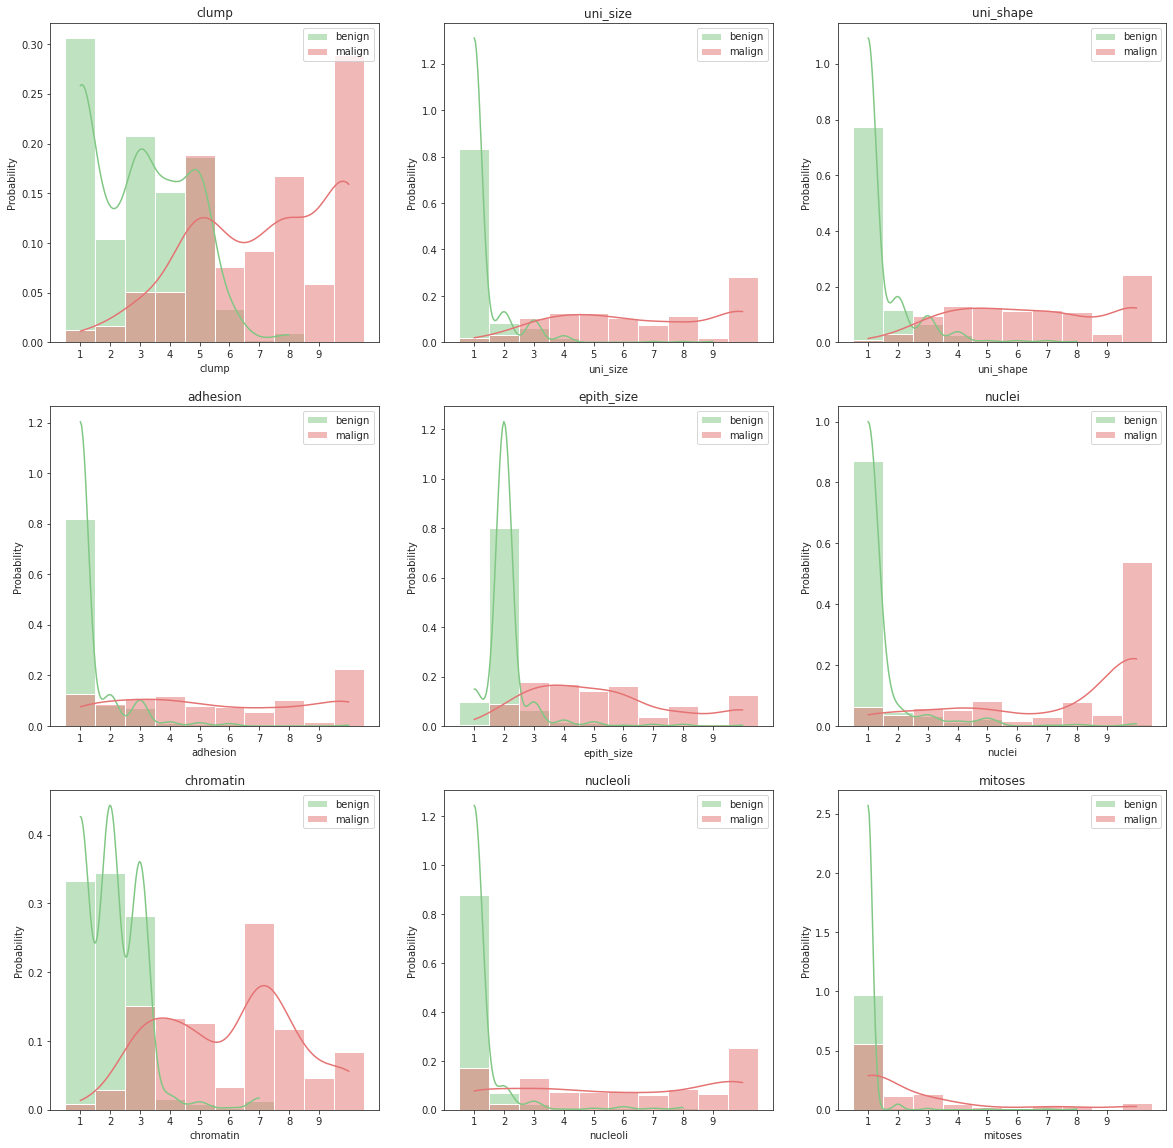

In [ ]:
plt.subplots(3, 3, figsize = (20, 20), facecolor = "white")

for i, col in enumerate(datasetPurged.columns[:9]):
  plt.subplot(3, 3, i+1)
  sns.histplot(datasetPurged.loc[datasetPurged['class'] == 'benign', col], stat="probability", label='benign', color="#81c784", element="bars", discrete=True, kde=True)
  sns.histplot(datasetPurged.loc[datasetPurged['class'] == 'malign', col], stat="probability", label='malign', color="#e57373", element="bars", discrete=True, kde=True)
  plt.title(col)
  plt.xticks(np.arange(1,10,1))
  plt.legend(loc='upper right')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; y

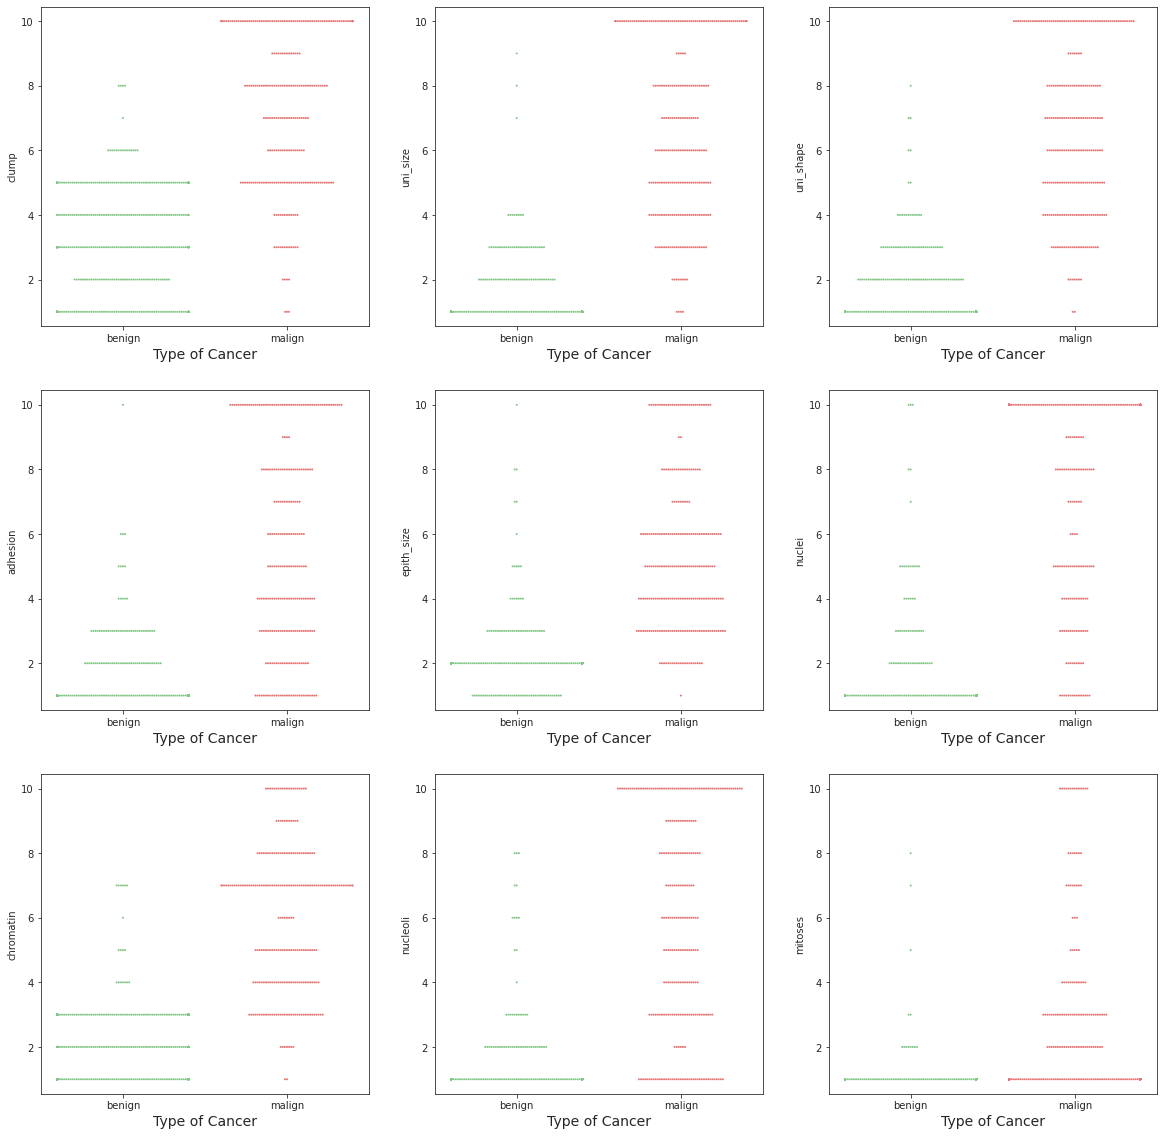

In [ ]:
plt.subplots(3, 3, figsize = (20, 20), facecolor = "white")
for i, col in enumerate(datasetPurged.columns[:9]):
  plt.subplot(3, 3, i+1)
  sns.swarmplot(y=datasetPurged.iloc[:, i] , x="class", size=2, palette=col_dict, data=datasetPurged);
  plt.xlabel("Type of Cancer", size=14)

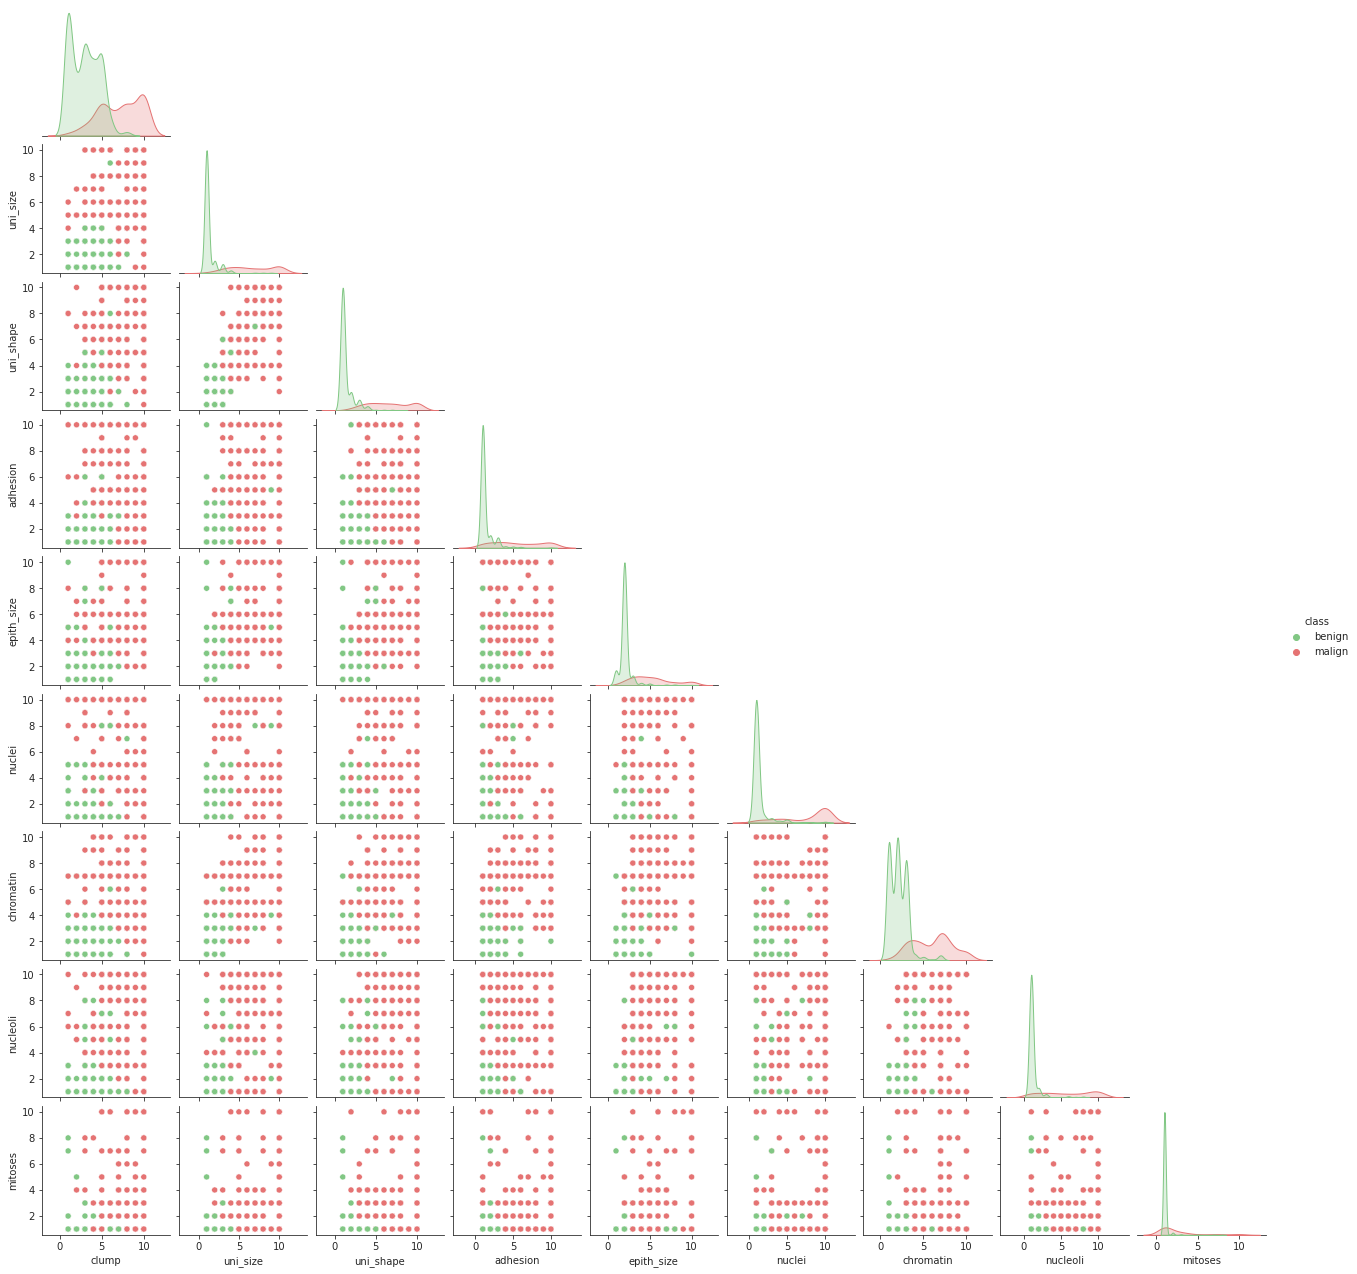

In [ ]:
import seaborn as sns
sns.set_style("ticks")

sns.pairplot(datasetPurged, hue = "class", diag_kind="kde", height=2, palette=col_dict, corner=True)


In [69]:
#splitting data and target dataframe
X = normalized_df.iloc[:, :9]
Y = encoded.iloc[:, 9]
